# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# **LOADING DATASET**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the file path to the dataset in your Drive
file_path = '/content/drive/MyDrive/Clustering/Mall_Customers.csv'

# Load the dataset
import pandas as pd
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **EDA**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

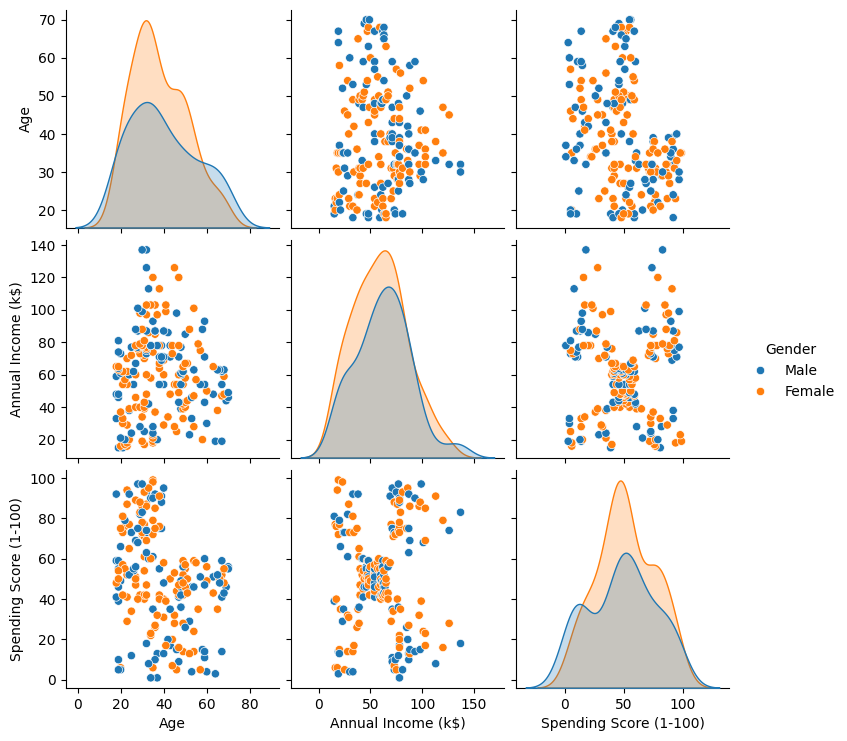

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.info())
print(df.describe())

# Plot pairplot without 'CustomerID' and color by 'Gender'
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

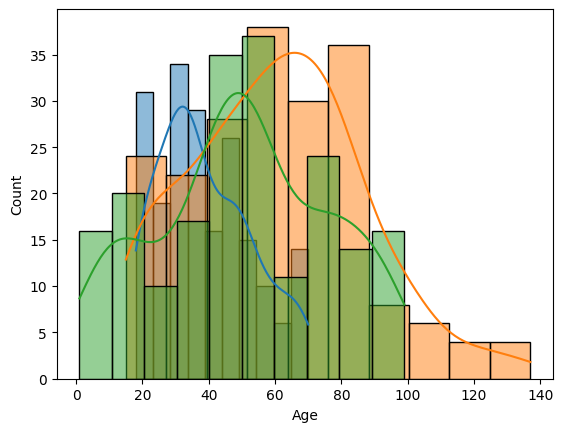

In [ ]:

sns.histplot(df['Age'], bins=10, kde=True)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)


<Axes: >

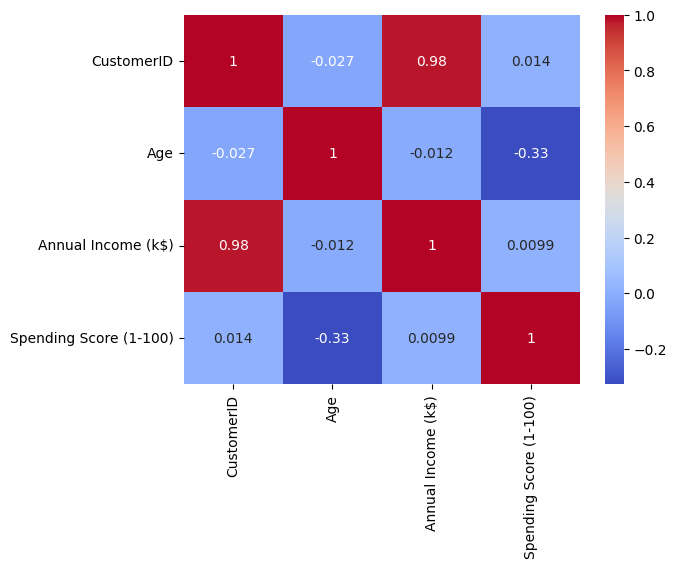

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


# **PRE-PROCESSING**

In [ ]:
from sklearn.preprocessing import StandardScaler

df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_encoded[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **K-MEANS CLUSTERING**

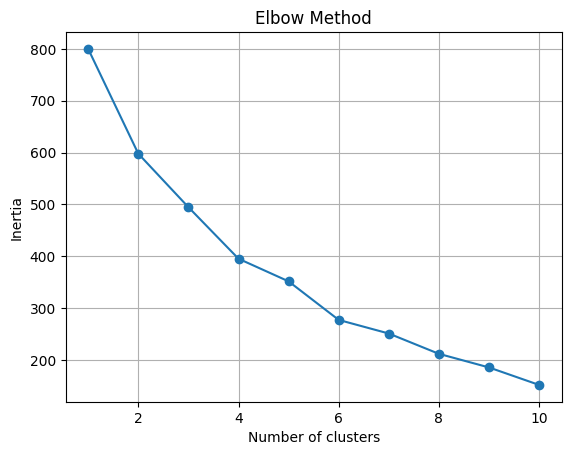

In [ ]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


# **HIERARCHIAL CLUSTERING**

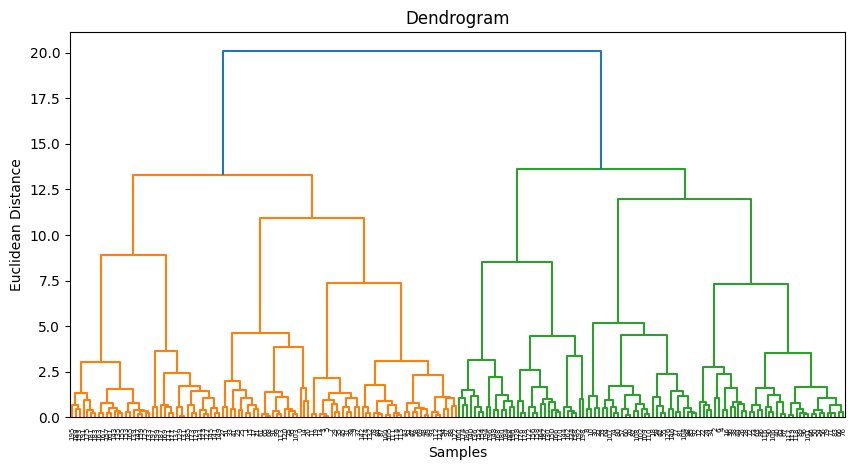

In [ ]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Cutting the dendrogram at a chosen number of clusters
df['Hierarchical_Cluster'] = fcluster(linked, t=5, criterion='maxclust')


# **VISUALIZING CLUSTERING**

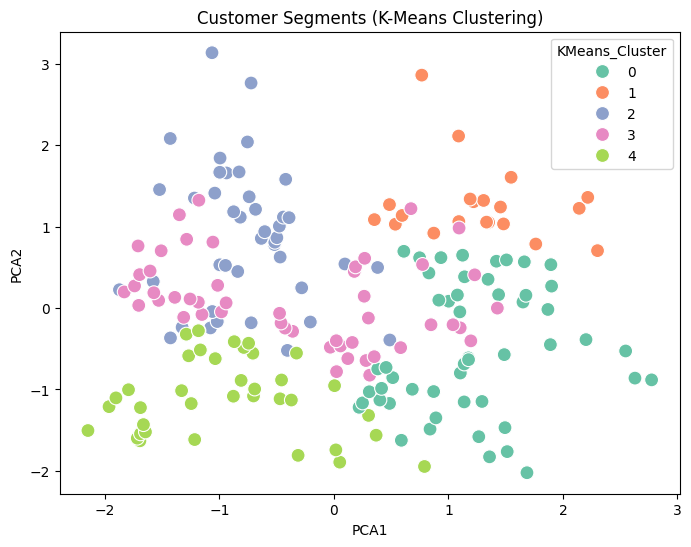

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2', s=100)
plt.title('Customer Segments (K-Means Clustering)')
plt.show()


# **CLUSTER ANALYSIS**

In [ ]:
for i in range(k):
    segment = df[df['KMeans_Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(segment[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())



Cluster 0 Summary:
Age                       56.470588
Annual Income (k$)        46.098039
Spending Score (1-100)    39.313725
dtype: float64

Cluster 1 Summary:
Age                       39.50
Annual Income (k$)        85.15
Spending Score (1-100)    14.05
dtype: float64

Cluster 2 Summary:
Age                       28.690476
Annual Income (k$)        60.904762
Spending Score (1-100)    70.238095
dtype: float64

Cluster 3 Summary:
Age                       37.897959
Annual Income (k$)        82.122449
Spending Score (1-100)    54.448980
dtype: float64

Cluster 4 Summary:
Age                       27.315789
Annual Income (k$)        38.842105
Spending Score (1-100)    56.210526
dtype: float64

Cluster 5 Summary:
Age                      NaN
Annual Income (k$)       NaN
Spending Score (1-100)   NaN
dtype: float64

Cluster 6 Summary:
Age                      NaN
Annual Income (k$)       NaN
Spending Score (1-100)   NaN
dtype: float64

Cluster 7 Summary:
Age                      NaN
Annu